###Μηχανική Μάθηση
####1η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2023-24



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

 `⚠️  Το σύνολο δεδομένων που σας δόθηκε δεν πρέπει να εμπλουτισθεί με οποιοδήποτε τρόπο. Η εργασία στην οποία θα χρησιμοποιηθεί εμπλουτισμένο σύνολο δεδομένων, δεν θα διορθωθεί.`

Ονοματεπώνυμο φοιτητή: Χριστόδουλος Στυλιανίδης

Α.Μ.: el20614

### 1. Εισαγωγή συνόλου δεδομένων

Tο σύνολο δεδομένων για το training-validation μπορείτε να το κατεβάσετε από [εδώ](https://drive.google.com/file/d/1_ndkaT6BoDuxxPPxLWq-oKDJqzO1Dlhg/view?usp=sharing) .


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1.α. Φορτώστε το σύνολο δεδομένων "train-val.csv"  στο notebook σας.

In [2]:
path="./train-val.csv"
df = pd.read_csv(path)

tables = df.head()
labels_weather = [i for i in tables]
print(labels_weather)#edw exw ta onomata tou kathe column

features_weather = df.values
print(features_weather)#disdiastatos pinakas me ta stixeia


['id', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']
[[1 '2009-03-04' 'Albury' ... 21.9 0.0 0.0]
 [2 '2009-03-05' 'Albury' ... 21.4 0.0 0.0]
 [3 '2009-03-09' 'Albury' ... 30.5 0.0 0.0]
 ...
 [48421 '2017-06-20' 'Uluru' ... 20.9 0.0 0.0]
 [48422 '2017-06-23' 'Uluru' ... 26.1 0.0 0.0]
 [48423 '2017-06-24' 'Uluru' ... 26.0 0.0 0.0]]


1.β. Φορτώστε το σύνολο δεδομένων "test.csv" στο notebook σας

In [3]:
path_test="./test.csv"
df_test = pd.read_csv(path_test)

tables_test = df_test.head()
labels_test = [i for i in tables]
print(labels_test)#pleon exw ta onomata tou kathe column

features_test = df_test.values
print(features_test)#disdiastatos pinakas me ta stixeia


['id', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']
[['22/03/2009' 'Albury' 14.6 ... 18.1 29.0 0]
 ['15/04/2009' 'Albury' 10.7 ... 20.5 18.9 0]
 ['21/04/2009' 'Albury' 5.7 ... 12.2 20.9 0]
 ...
 ['11/05/2017' 'Uluru' 4.1 ... 13.4 23.7 0]
 ['09/06/2017' 'Uluru' 3.4 ... 8.7 18.9 0]
 ['17/06/2017' 'Uluru' 6.4 ... 11.2 23.1 0]]


### 2. Διερευνητική ανάλυση δεδομένων -Exploratory Data Analysis (EDA)
Χρησιμοποιήστε code cells  με τις κατάλληλες τεχνικές EDA για την κατανόηση του συνόλου δεδομένων και text cells για επεξήγηση των αποτελεσμάτων.

Χρησιμοποιώντας τις κατάλληλες μεθόδους παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. το πλήθος των δειγμάτων και των χαρακτηριστικών του συνόλου δεδομένων,

2β. το είδος των χαρακτηριστικών του συνόλου δεδομένων,  

2γ. τις ετικέτες των χαρακτηριστικών,

2δ. το πλήθος των κατηγοριών,

2ε. πόσα δείγματα ανήκουν σε κάθε κατηγορία,

2στ. τη συσχέτιση μεταξύ των δεδομένων,

2ζ. οποιαδήποτε άλλη πληροφορία πιστεύετε ότι είναι χρήσιμη για την κατανόηση του συνόλου δεδομένων.

In [4]:
#gia to EDA edw, tha asxolithume mono me to arxeio train-val.csv:
# 2a
print("Ερώτημα 2α:")
num_samples, num_features = df.shape
print("Τα δείγματα απο το αρχείο train-val.csv είναι: %d"%num_samples)#disdiastatos pinakas me ta stixeia (deigmata)
print("Με %d χαρακτηριστικά το κάθε δείγμα"%num_features,end="\n\n")#pleon exw ta onomata tou kathe column (xaraktiristika)

Ερώτημα 2α:
Τα δείγματα απο το αρχείο train-val.csv είναι: 48423
Με 24 χαρακτηριστικά το κάθε δείγμα



In [5]:
# 2b
print("Ερώτημα 2β:")
data_types = df.dtypes
print("Το είδος του κάθε χαρακτηριστικού:")
print(data_types,end="\n\n")

Ερώτημα 2β:
Το είδος του κάθε χαρακτηριστικού:
id                 int64
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RainTomorrow     float64
dtype: object



In [6]:
# 2c ειναι μονο 0 kai 1 που αντιστοιχουν σε false true
print("Ερώτημα 2γ:")
attribute_labels = df['RainTomorrow']
category_counts = attribute_labels.value_counts()
print("Η κλάση του RainTomorrow έχει τις εξής τιμές:")
print(category_counts,end="\n\n")

Ερώτημα 2γ:
Η κλάση του RainTomorrow έχει τις εξής τιμές:
RainTomorrow
0.0    37364
1.0    11059
Name: count, dtype: int64



In [7]:
# 2d
print("Ερώτημα 2δ:")
num_categories = df.nunique()
print("Το πλήθος των κατηγοριών:")
# dld poses diaforetikes times exei kathe katigoria
# paratiroume oti to Date exei 2534, dld 2534 diaforetikes
# meres, dld to csv arxeio exei peripou 7 xronia worth of data!
print(num_categories,end="\n\n")

Ερώτημα 2δ:
Το πλήθος των κατηγοριών:
id               48423
Date              2534
Location            49
MinTemp            364
MaxTemp            456
Rainfall           443
Evaporation        231
Sunshine           140
WindGustDir         16
WindGustSpeed       61
WindDir9am          16
WindDir3pm          16
WindSpeed9am        40
WindSpeed3pm        42
Humidity9am        101
Humidity3pm        101
Pressure9am        508
Pressure3pm        497
Cloud9am            10
Cloud3pm             9
Temp9am            396
Temp3pm            452
RainToday            2
RainTomorrow         2
dtype: int64



In [8]:
# 2e posa 0 kai 1 exei to RainTomorrow 
print("Ερώτημα 2ε:") 
attribute_labels = df['RainTomorrow']
category_counts = attribute_labels.value_counts()
print("Η κλάση του RainTomorrow έχει τις εξής τιμές:")
print(category_counts,end="\n\n")

Ερώτημα 2ε:
Η κλάση του RainTomorrow έχει τις εξής τιμές:
RainTomorrow
0.0    37364
1.0    11059
Name: count, dtype: int64



Ερώτημα 2στ:
Συσχέτιση μεταξύ των δεδομένων:


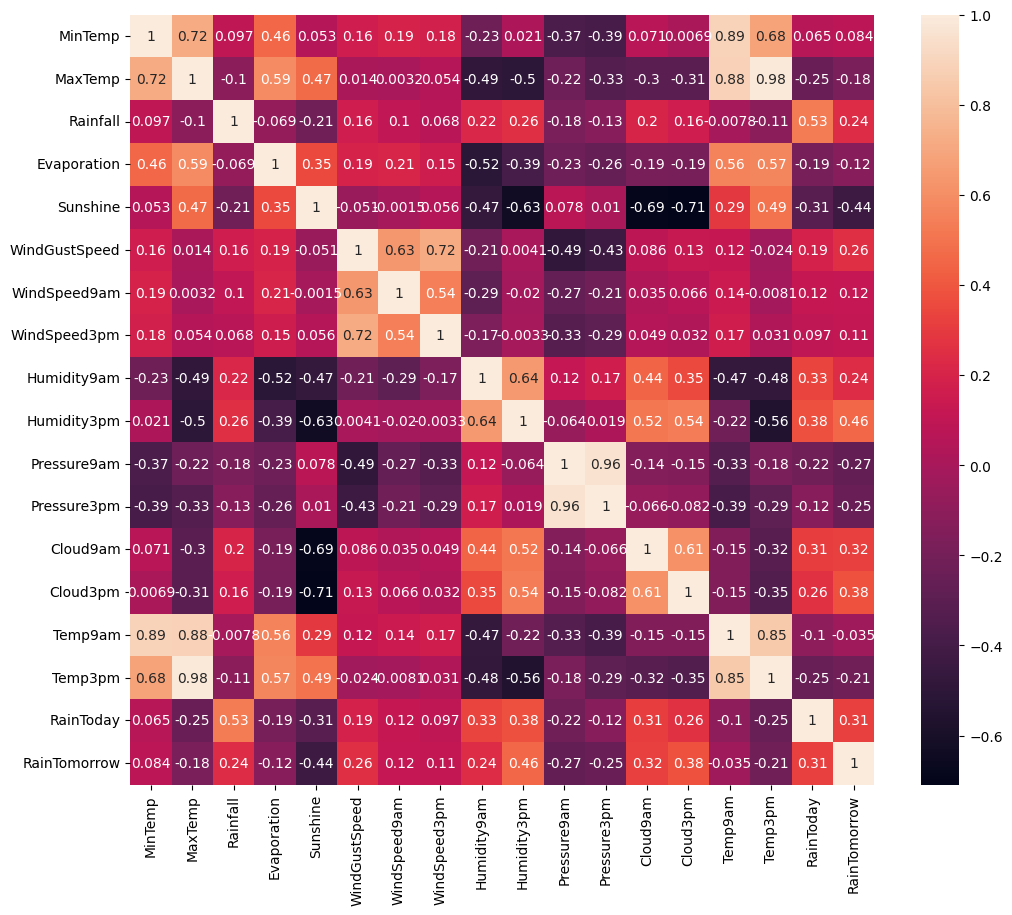

In [9]:
# 2στ
print("Ερώτημα 2στ:")
numeric_df = df.select_dtypes(include=['float64'])#agnow to int64 giati den me endiaferei to id
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))#gia na fenontai oi arithmoi

print("Συσχέτιση μεταξύ των δεδομένων:")
%matplotlib inline
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Ερώτημα 2ζ:
Επιλέγω να παρουσιάσω πόσες τιμές λείπουν απο την κάθε κατηγορία:
id                   0
Date                 0
Location             0
MinTemp            160
MaxTemp            101
Rainfall             0
Evaporation      20384
Sunshine         22997
WindGustDir       3121
WindGustSpeed     3093
WindDir9am        3821
WindDir3pm        1328
WindSpeed9am       357
WindSpeed3pm       857
Humidity9am        558
Humidity3pm       1259
Pressure9am       4780
Pressure3pm       4789
Cloud9am         17890
Cloud3pm         18981
Temp9am            226
Temp3pm            913
RainToday            0
RainTomorrow         0
dtype: int64
Παρουσιάζω επίσης την κατανομή των μέγιστων θερμοκρασιών:


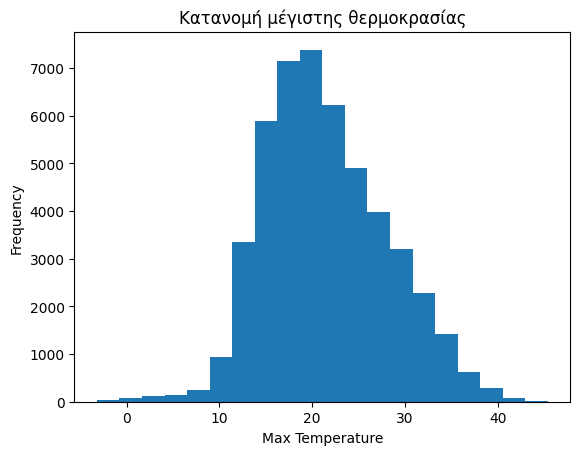

In [10]:
# 2ζ
print("Ερώτημα 2ζ:")
print("Επιλέγω να παρουσιάσω πόσες τιμές λείπουν απο την κάθε κατηγορία:")
missing_values = df.isnull().sum()
print(missing_values)

print("Παρουσιάζω επίσης την κατανομή των μέγιστων θερμοκρασιών:")


df['MaxTemp'].plot.hist(bins=20)
plt.xlabel("Max Temperature")
plt.title("Κατανομή μέγιστης θερμοκρασίας")
plt.show()

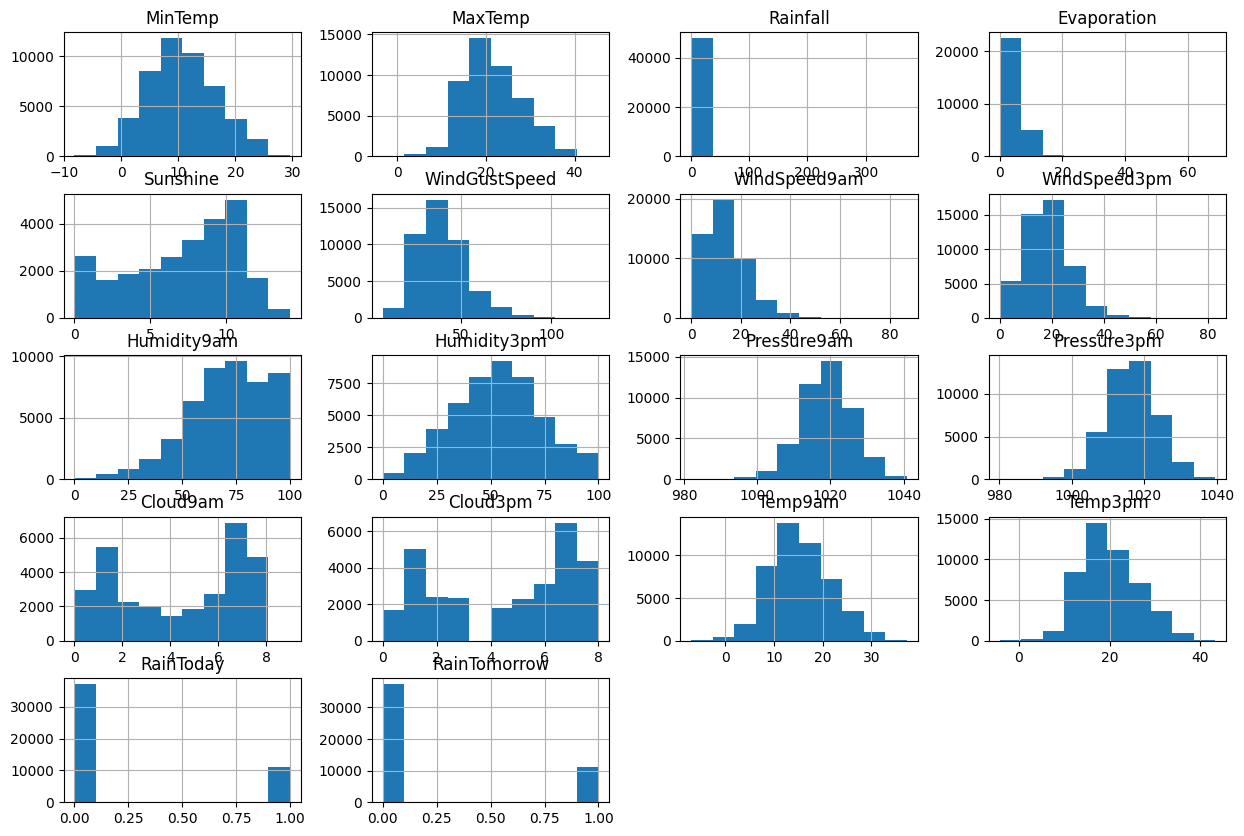

In [11]:
#Επίσης, όπως και στο εργαστήριο 3.4 οπτικοποιουμε το συνολο δεδομενων
  
selected_columns = df.iloc[:, 2:]  # ta prwta duo einai id kai date, den exei noima na ta kanw plot

# Plot histograms for the selected columns
selected_columns.hist(bins=10, figsize=(15, 10))
plt.show()

### 3. Προεπεξεργασία συνόλου δεδομένων
💡`Χρησιμοποιήστε το Column Transformer για τη δημιουργία και την εφαρμογή χωριστών μετασχηματιστών για αριθμητικά και κατηγορικά δεδομένα.`




3.α.  Θα χρησιμοποιήσετε όλα τα χαρακτηριστικά του συνόλου δεδομένων για την εκπαίδευση των ταξινομητών ή θα επιλέξετε κάποια από αυτά;  Θα κάνετε κάποια συνένωση κάποιων χαρακτηριστικών για δημιουργία νέων χαρακτηριστικών για το μοντέλο σας;


In [12]:
# Θεωρώ ότι ειναι απαραιτητο να χρησιμοποιήσω όλα τα στοιχεία,
# καθώς ειναι όλα απαραιτητα για την πρόβλεψη του αν θα βρέξει αυριο ή οχι
# Αν ηθελα να διαγράψω κατι για να μην το χρησιμοποιήσω θα εφευγα το MinTemp το οποίο εχει το πιο μικρό correllation μεταξύ του RainTomorrow
# Τελικά αποφασίζω να αφαιρεσω το RainToday και το id το οποίο δεν προβλεπει την αυριανη βροχή
df.drop(['id', 'RainToday'], axis=1, inplace=True)

# Ναι, βεβαιως θα συνενώσω μερικά απο τα χαρακτηριστικά
# (πχ. Temp9am Temp3pm μπορει να γίνει TempCombined)
# (πχ. WindDir9am WindDir3pm μπορεί να γίνει WindDirCombined)


df['WindDirCombined'] = df['WindDir9am'].fillna('') + df['WindDir3pm'].fillna('')
df['WindDirCombined'] = df['WindDirCombined'].apply(lambda x: ''.join(sorted(set(x))))
# To pws mazepsa to WindDir einai ligo anorthodokso,
# afto pou ekana einai na kanw merge to string tou 9am kai 3pm 
# kai meta apo to merged string to "katharisa" etsi wste 
# na exei mia fora to kathe direction apo ta NESW 

# mazevw ta dedomena pou einai float64 kai einai stis 9am kai 3pm me meso oro
df['AvgWindSpeed'] = df[['WindSpeed9am','WindSpeed3pm']].mean(axis=1)
df['AvgPressure'] = df[['Pressure9am','Pressure3pm']].mean(axis=1)
df['AvgCloud'] = df[['Cloud9am','Cloud3pm']].mean(axis=1)

# afta eixan pio megalo correlation giafto krataw mono ta 3pm:
df['Humidity'] = (df['Humidity3pm']) 
df['Temp'] = (df['Temp3pm'])

# allazw kai to date se day,month,year
df['Date'] = pd.to_datetime(df['Date'])
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

# Petaw ta columns pou den xreiazomai pleon
df.drop(['Date','WindDir9am','WindDir3pm','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'], axis=1, inplace=True)

print(df)

      Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0       Albury     13.8     22.1       0.2          NaN       NaN         WNW   
1       Albury     11.5     22.0       0.0          NaN       NaN          SW   
2       Albury     13.8     31.8       0.0          NaN       NaN         NNE   
3       Albury     15.5     32.0       0.0          NaN       NaN          NE   
4       Albury     18.4     30.5       1.2          NaN       NaN          NE   
...        ...      ...      ...       ...          ...       ...         ...   
48418    Uluru      5.1     19.7       0.0          NaN       NaN           E   
48419    Uluru      5.2     24.3       0.0          NaN       NaN           E   
48420    Uluru      3.5     21.8       0.0          NaN       NaN           E   
48421    Uluru      5.4     26.9       0.0          NaN       NaN           N   
48422    Uluru      7.8     27.0       0.0          NaN       NaN          SE   

       WindGustSpeed  RainT

3.β. Υπάρχουν απουσιάζουσες τιμές; Γράψτε κατάλληλο κώδικα ώστε να χειριστείτε αυτές τις τιμές.

In [13]:
from sklearn.impute import SimpleImputer

#dixnw ta missing values
print("Οι τιμές που λείπουν απο την κάθε κατηγορία:")
missing_values = df.isnull().sum()
print(missing_values,df.shape)


# xwrizw ta columns se katigorikes metablites kai arithmitikes metablites
numeric_cols = df.select_dtypes(include=['float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# apo to SimpleImputer epilegw to average gia ta columns pou exoun arithmous
numeric_imputer = SimpleImputer(strategy='mean')

# Enw gia ta categorical to value me ta perissotera appearances
categorical_imputer = SimpleImputer(strategy='most_frequent')

# ta kanw apply sto df
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# deixnw oti den mou leipei tipota!
print("Οι τιμές που λείπουν απο την κάθε κατηγορία:")
missing_values = df.isnull().sum()
print(missing_values,df.shape)


Οι τιμές που λείπουν απο την κάθε κατηγορία:
Location               0
MinTemp              160
MaxTemp              101
Rainfall               0
Evaporation        20384
Sunshine           22997
WindGustDir         3121
WindGustSpeed       3093
RainTomorrow           0
WindDirCombined        0
AvgWindSpeed         262
AvgPressure         4717
AvgCloud           16571
Humidity            1259
Temp                 913
day                    0
month                  0
year                   0
dtype: int64 (48423, 18)
Οι τιμές που λείπουν απο την κάθε κατηγορία:
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir        0
WindGustSpeed      0
RainTomorrow       0
WindDirCombined    0
AvgWindSpeed       0
AvgPressure        0
AvgCloud           0
Humidity           0
Temp               0
day                0
month              0
year               0
dtype: int64 (48423, 18)


3.γ. Γράψτε κώδικα για την κατάλληλη μετατροπή των κατηγορικών μεταβλητών ώστε να μπορούν να τους διαχειριστούν οι ταξινομητές που θα χρησιμοποιήσετε.

In [14]:
#profanos tha exoume thema me ta strings, giafto ta kanoume encode etsi:
from sklearn.preprocessing import LabelEncoder
 
encoder=LabelEncoder()
df['Location']=encoder.fit_transform(df['Location'])
df['WindGustDir']=encoder.fit_transform(df['WindGustDir']) 
df['WindDirCombined']=encoder.fit_transform(df['WindDirCombined'])
 

In [15]:
data_types = df.dtypes
print("Το είδος του κάθε χαρακτηριστικού:")
print(data_types,end="\n\n")

Το είδος του κάθε χαρακτηριστικού:
Location             int32
MinTemp            float64
MaxTemp            float64
Rainfall           float64
Evaporation        float64
Sunshine           float64
WindGustDir          int32
WindGustSpeed      float64
RainTomorrow       float64
WindDirCombined      int32
AvgWindSpeed       float64
AvgPressure        float64
AvgCloud           float64
Humidity           float64
Temp               float64
day                  int32
month                int32
year                 int32
dtype: object



Συσχέτιση μεταξύ των δεδομένων:


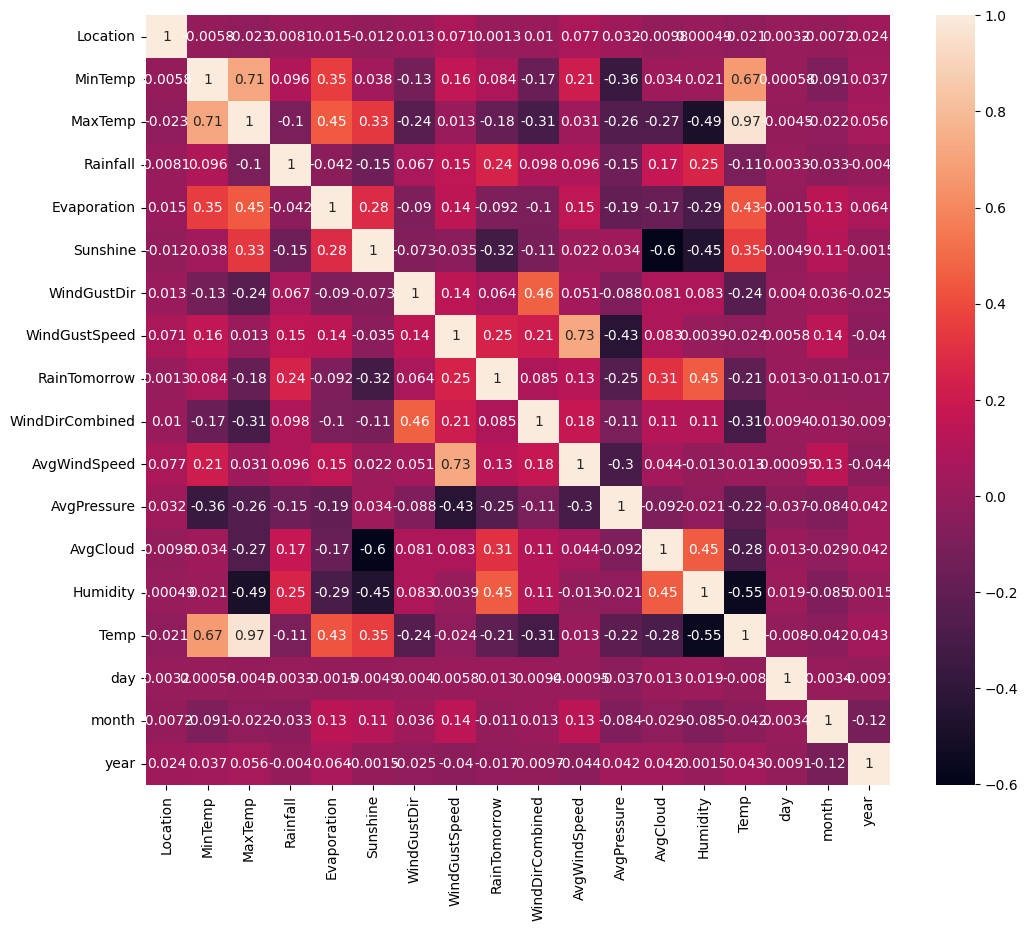

In [16]:
#gia correlation 
numeric_df = df.select_dtypes(include=['float64','int32'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))#gia na fenontai oi arithmoi

print("Συσχέτιση μεταξύ των δεδομένων:")
%matplotlib inline
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True)
plt.show()

3.δ. Γράψτε κώδικα για την κλιμάκωση των χαρακτηριστικών, αν την θεωρείτε απαραίτητη

3.ε. Εκτελέστε όλα τα προηγούμενα βήμα προεκπαίδευσης (χρήση μετασχηματιστών) ώστε να είναι "καθαρό" το αρχικό σύνολο για να χρησιμοποιηθεί για την εκπαίδευση των ταξινομητών.

In [17]:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numeric_cols_ind = [df.columns.get_loc(col) for col in df.select_dtypes(include=['float64']).columns]
categorical_cols_ind = [df.columns.get_loc(col) for col in df.select_dtypes(include=['object']).columns]
# to categorical einai adeia apla ta krataw gia plirwtita


# handle numeric features 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# handle categorical features 
# afto to transformer einai axristo, 
# apla to krataw se periptosi pou to xreiastw se kapoia alli askisi
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', OneHotEncoder(handle_unknown='ignore'))])
 
# Create a transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols_ind),
        ('cat', categorical_transformer, categorical_cols_ind)
        ])


3.στ. Αφού έχετε "καθαρίσει" το αρχικό σύνολο εκπαίδευσης, γράψτε τον κατάλληλο κώδικα ώστε από το αρχικό σύνολο εκπαίδευσης να δημιουργήσετε τα σύνολα Χ και y.

💡 `Η στήλη 'RainTomorrow' είναι η τιμή που θέλουμε να προβλέψει ο ταξινομητής μας.`



In [18]:
X = df.drop('RainTomorrow', axis= 1).values 
y = df['RainTomorrow'].values

In [19]:
df


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,RainTomorrow,WindDirCombined,AvgWindSpeed,AvgPressure,AvgCloud,Humidity,Temp,day,month,year
0,2,13.8,22.1,0.2,4.590831,7.162259,14,57.0,0.0,12,29.5,1013.80,4.470473,26.0,21.9,4,3,2009
1,2,11.5,22.0,0.0,4.590831,7.162259,12,50.0,0.0,14,26.0,1012.75,4.470473,33.0,21.4,5,3,2009
2,2,13.8,31.8,0.0,4.590831,7.162259,5,24.0,0.0,3,11.5,1017.80,4.470473,28.0,30.5,9,3,2009
3,2,15.5,32.0,0.0,4.590831,7.162259,4,50.0,1.0,6,3.0,1017.85,4.470473,25.0,30.8,10,3,2009
4,2,18.4,30.5,1.2,4.590831,7.162259,4,44.0,0.0,2,17.0,1019.65,4.470473,23.0,29.6,11,3,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48418,41,5.1,19.7,0.0,4.590831,7.162259,0,46.0,0.0,6,15.0,1027.15,4.470473,29.0,19.2,12,6,2017
48419,41,5.2,24.3,0.0,4.590831,7.162259,0,24.0,0.0,6,11.0,1021.90,4.470473,24.0,23.3,16,6,2017
48420,41,3.5,21.8,0.0,4.590831,7.162259,0,31.0,0.0,6,14.0,1022.95,4.470473,27.0,20.9,20,6,2017
48421,41,5.4,26.9,0.0,4.590831,7.162259,3,37.0,0.0,4,9.0,1018.90,4.470473,24.0,26.1,23,6,2017


3.ζ. Διαχωρίστε το σύνολο δεδομένων σε σύνολο εκπαίδευσης (train set) και σε σύνολο επικύρωσης (validation set) (ο διαχωρισμός να είναι train set 70% και validation set 30%).


In [20]:
from sklearn.model_selection import train_test_split

# Split to dataset se 70% training kai 30% validation
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
 

### 4. Εκπαίδευση μοντέλου με default τιμές στις παραμέτρους των ταξινομητών

Θα εκπαιδεύσουμε τους ακόλουθους ταξινομητές με το σύνολο εκπαίδευσης των δεδομένων μας:
1. Naive Bayes
2. KNeighborsClassifier
3. LogisticRegression
4. MLP με ένα κρυφό επίπεδο
5. SVC
6. Decision Tree
7. Random Forest


 4.α. Εκπαιδεύστε (fit)  και τους  7 ταξινομητές που προαναφέρθηκαν (εμφανίστε τα δείγματα από το train set μαζί με την ετικέτα τους στην είσοδο του κάθε ταξινομητή), χρησιμοποιώντας τις default τιμές για όλες τις παραμέτρους τους.

 4.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).
 
 4.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [21]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

1. Naive Bayes 

In [22]:
from sklearn.naive_bayes import GaussianNB

# (a) Train
classifier = GaussianNB()
model_NB = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])

# (a) Train
model_NB.fit(X_train, y_train)

# (b) Predict
y_pred = model_NB.predict(X_test)

# (c) Evaluate
print(classification_report(y_test, y_pred))
f1_nbc = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
print('Naive Bayes f1_score: ', f1_nbc)

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88     11184
         1.0       0.60      0.58      0.59      3343

    accuracy                           0.81     14527
   macro avg       0.74      0.73      0.73     14527
weighted avg       0.81      0.81      0.81     14527

Naive Bayes f1_score:  0.8131394416211276


2. KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
model_KNN = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])

# (a) Train
model_KNN.fit(X_train, y_train)

# (b) Predict
y_pred = model_KNN.predict(X_test)

# (c) Evaluate
print(classification_report(y_test, y_pred))
f1_knn = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
print('KNeighborsClassifier f1_score: ', f1_knn)

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89     11184
         1.0       0.68      0.51      0.58      3343

    accuracy                           0.83     14527
   macro avg       0.77      0.72      0.74     14527
weighted avg       0.82      0.83      0.82     14527

KNeighborsClassifier f1_score:  0.8216776641235511


3. LogisticRegression

In [24]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
model_LR = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])

# (a) Train
model_LR.fit(X_train, y_train)

# (b) Predict
y_pred = model_LR.predict(X_test)

# (c) Evaluate
print(classification_report(y_test, y_pred))
f1_lr = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
print('Logistic Regression f1_score: ', f1_lr)

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     11184
         1.0       0.72      0.49      0.59      3343

    accuracy                           0.84     14527
   macro avg       0.79      0.72      0.74     14527
weighted avg       0.83      0.84      0.83     14527

Logistic Regression f1_score:  0.8287450966183677


4. MLP με ένα κρυφό επίπεδο

In [25]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
model_MLP = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])

# (a) Train
model_MLP.fit(X_train, y_train)

# (b) Predict
y_pred = model_MLP.predict(X_test)

# (c) Evaluate
print(classification_report(y_test, y_pred))
f1_mlp = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
print('MLP with hidden layer f1_score: ', f1_mlp)

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     11184
         1.0       0.76      0.51      0.61      3343

    accuracy                           0.85     14527
   macro avg       0.81      0.73      0.76     14527
weighted avg       0.84      0.85      0.84     14527

MLP with hidden layer f1_score:  0.8392052050533361


5. SVC

In [26]:
from sklearn.svm import SVC
 
classifier = SVC()
model_SVC = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])

# (a) Train
model_SVC.fit(X_train, y_train)

# (b) Predict
y_pred = model_SVC.predict(X_test)

# (c) Evaluate
print(classification_report(y_test, y_pred))
f1_svc = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
print('SVC f1_score: ', f1_svc)

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     11184
         1.0       0.79      0.46      0.58      3343

    accuracy                           0.85     14527
   macro avg       0.82      0.71      0.74     14527
weighted avg       0.84      0.85      0.83     14527

SVC f1_score:  0.8323558617897907


6. Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
 
classifier = DecisionTreeClassifier()
model_DT = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])

# (a) Train
model_DT.fit(X_train, y_train)

# (b) Predict
y_pred = model_DT.predict(X_test)

# (c) Evaluate
print(classification_report(y_test, y_pred))
f1_dt = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
print('Decision Tree f1_score: ', f1_dt)

              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86     11184
         1.0       0.53      0.55      0.54      3343

    accuracy                           0.78     14527
   macro avg       0.70      0.70      0.70     14527
weighted avg       0.79      0.78      0.78     14527

Decision Tree f1_score:  0.7849401152015237


7. Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
 
classifier = RandomForestClassifier()
model_RF = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])

# (a) Train
model_RF.fit(X_train, y_train)

# (b) Predict
y_pred = model_RF.predict(X_test)

# (c) Evaluate
print(classification_report(y_test, y_pred))
f1_rf = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
print('Random Forest f1_score: ', f1_rf)

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     11184
         1.0       0.76      0.52      0.62      3343

    accuracy                           0.85     14527
   macro avg       0.82      0.74      0.76     14527
weighted avg       0.85      0.85      0.84     14527

Random Forest f1_score:  0.8425631816620316


 4.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.

In [29]:
#Tha dimiourgisw mia lista opou einai sorted os pros to F1_score tous
#ta bazw se dictionaries (name, score)
model_results = {
    'Model': ['Naive Bayes', 'KNeighborsClassifier', 'Logistic Regression', 'MLP with a hidden layer', 'SVC', 'Decision Tree', 'Random Forest'],
    'F1_Score': [f1_nbc, f1_knn, f1_lr, f1_mlp, f1_svc, f1_dt, f1_rf]
}

# to metatrepw se df
models = pd.DataFrame(model_results)

# to kanw sort ws pros to score
models_sorted = models.sort_values(by='F1_Score', ascending=False)

# afto to evala giati to prwto index einai 0 (axreiasto apla gia plirotita)
models_sorted.index = models_sorted.index + 1

print(models_sorted)
best_model = (models_sorted['Model'].values[0])#krataw to onoma tou best, giati kanw xrisi dictionary parakato

                     Model  F1_Score
7            Random Forest  0.842563
4  MLP with a hidden layer  0.839205
5                      SVC  0.832356
3      Logistic Regression  0.828745
2     KNeighborsClassifier  0.821678
1              Naive Bayes  0.813139
6            Decision Tree  0.784940


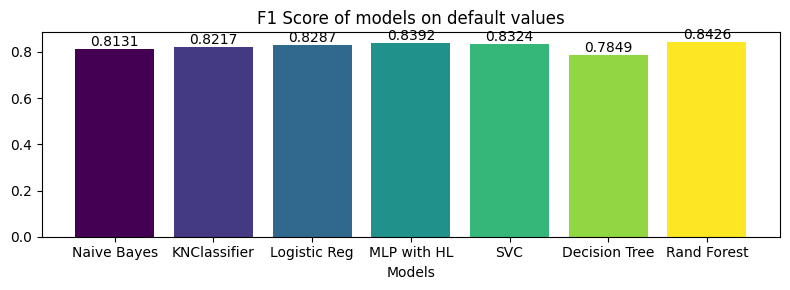

In [30]:
#ta parousiazw kai se ena graph:

models = ['Naive Bayes', 'KNClassifier', 'Logistic Reg', 'MLP with HL', 'SVC', 'Decision Tree', 'Rand Forest']
F1_Score = [f1_nbc, f1_knn, f1_lr, f1_mlp, f1_svc, f1_dt, f1_rf]

fig, ax = plt.subplots(figsize=(8, 3))

bars = ax.bar(models, F1_Score, color=plt.cm.viridis(np.linspace(0, 1, len(models))))

# Adding labels
ax.set_xlabel('Models')
ax.set_title('F1 Score of models on default values')

# Adding F1 Score values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

plt.tight_layout()
plt.show()


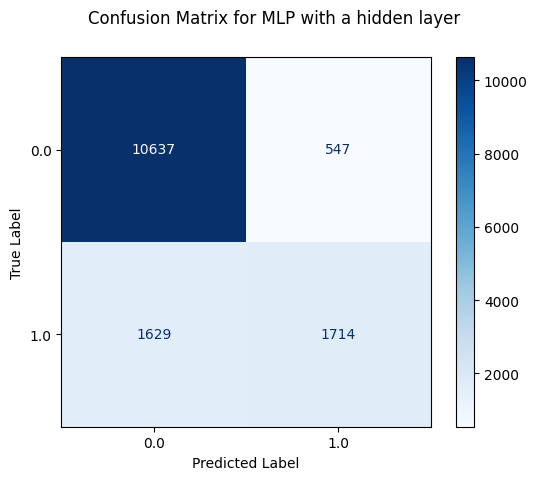

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

# Create a confusion matrix display object
matrix = ConfusionMatrixDisplay.from_estimator(model_MLP, X_test, y_test, cmap=plt.cm.Blues)

# Customize the plot
color = 'black'
matrix.figure_.suptitle('Confusion Matrix for MLP with a hidden layer', color=color)
matrix.ax_.set_xlabel('Predicted Label', color=color)
matrix.ax_.set_ylabel('True Label', color=color)
matrix.ax_.tick_params(axis='x', colors=color)
matrix.ax_.tick_params(axis='y', colors=color)

# Display the plot
plt.show()

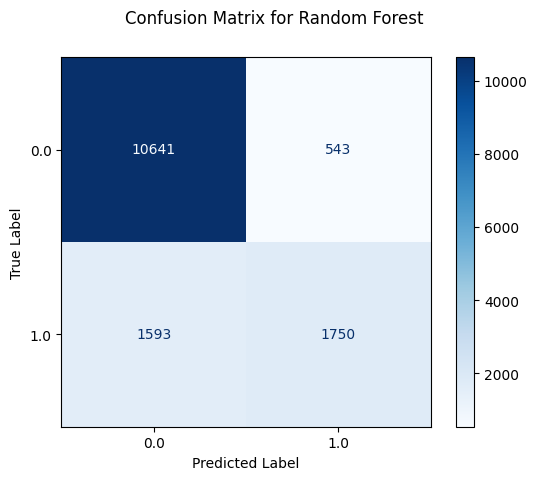

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

# Create a confusion matrix display object
matrix = ConfusionMatrixDisplay.from_estimator(model_RF, X_test, y_test, cmap=plt.cm.Blues)

# Customize the plot
color = 'black'
matrix.figure_.suptitle('Confusion Matrix for Random Forest', color=color)
matrix.ax_.set_xlabel('Predicted Label', color=color)
matrix.ax_.set_ylabel('True Label', color=color)
matrix.ax_.tick_params(axis='x', colors=color)
matrix.ax_.tick_params(axis='y', colors=color)

# Display the plot
plt.show()

### 5. Προετοιμασία αρχείου για την πρώτη υποβολή στο kaggle

5.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις, χρησιμοποιώντας το σύνολο εκπαίδευσης [test set](https://drive.google.com/file/d/18PMqdPSuJ4CurrzYlahooNMJWZ_8n11o/view?usp=sharing).


In [33]:
# ksana gia na min pextei lathos
path_test="./test.csv"
df_test = pd.read_csv(path_test)

In [34]:
num_samples_test, num_features_test = df_test.shape
print("Τα δείγματα απο το αρχείο test.csv είναι: %d"%num_samples_test)#disdiastatos pinakas me ta stixeia (deigmata)
print("Με %d χαρακτηριστικά το κάθε δείγμα"%num_features_test,end="\n\n")#pleon exw ta onomata tou kathe column (xaraktiristika)

Τα δείγματα απο το αρχείο test.csv είναι: 9699
Με 22 χαρακτηριστικά το κάθε δείγμα



In [35]:
df_test['WindDirCombined'] = df_test['WindDir9am'].fillna('') + df_test['WindDir3pm'].fillna('')
df_test['WindDirCombined'] = df_test['WindDirCombined'].apply(lambda x: ''.join(sorted(set(x))))
 
df_test['AvgWindSpeed'] = df_test[['WindSpeed9am','WindSpeed3pm']].mean(axis=1)
df_test['AvgPressure'] = df_test[['Pressure9am','Pressure3pm']].mean(axis=1)
df_test['AvgCloud'] = df_test[['Cloud9am','Cloud3pm']].mean(axis=1)

df_test['Humidity'] = (df_test['Humidity3pm'])
df_test['Temp'] = (df_test['Temp3pm'])

df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test['day'] = df_test['Date'].dt.day
df_test['month'] = df_test['Date'].dt.month
df_test['year'] = df_test['Date'].dt.year

df_test.drop(['RainToday','Date','WindDir9am','WindDir3pm','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'], axis=1, inplace=True)

# Ta parapanw einai AKRIVOS idia methodos me to df pou egine parapanw

C:\Users\chris\AppData\Local\Temp\ipykernel_10568\2095741658.py:11: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_test['Date'] = pd.to_datetime(df_test['Date'])


In [36]:
from sklearn.impute import SimpleImputer

#dixnw ta missing values
print("Οι τιμές που λείπουν απο την κάθε κατηγορία:")
missing_values = df_test.isnull().sum()
print(missing_values,df_test.shape)


# xwrizw ta columns se katigorikes metablites kai arithmitikes metablites
numeric_cols = df_test.select_dtypes(include=['float64']).columns
categorical_cols = df_test.select_dtypes(include=['object']).columns

# apo to SimpleImputer epilegw to average gia ta columns pou exoun arithmous
numeric_imputer = SimpleImputer(strategy='mean')

# Enw gia ta categorical to value me ta perissotera appearances
categorical_imputer = SimpleImputer(strategy='most_frequent')

# ta kanw apply sto df
df_test[numeric_cols] = numeric_imputer.fit_transform(df_test[numeric_cols])
df_test[categorical_cols] = categorical_imputer.fit_transform(df_test[categorical_cols])

# deixnw oti den mou leipei tipota!
print("Οι τιμές που λείπουν απο την κάθε κατηγορία:")
missing_values = df_test.isnull().sum()
print(missing_values,df_test.shape)


Οι τιμές που λείπουν απο την κάθε κατηγορία:
Location              0
MinTemp              35
MaxTemp              16
Rainfall              0
Evaporation        4139
Sunshine           4636
WindGustDir         692
WindGustSpeed       688
WindDirCombined       0
AvgWindSpeed         55
AvgPressure         937
AvgCloud           3346
Humidity            243
Temp                188
day                   0
month                 0
year                  0
dtype: int64 (9699, 17)
Οι τιμές που λείπουν απο την κάθε κατηγορία:
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir        0
WindGustSpeed      0
WindDirCombined    0
AvgWindSpeed       0
AvgPressure        0
AvgCloud           0
Humidity           0
Temp               0
day                0
month              0
year               0
dtype: int64 (9699, 17)


In [37]:
#kanw ola ta katigorimata arithmous me ta labels
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()
for i in df_test:
    if df_test[i].dtype=='object':
        df_test[i] = le.fit_transform(df_test[i])
    else:
        continue

In [38]:
# epilegw na kanw predict me to best model
# epeidi kathe fora pou to trexw (afou kanw allages) mporei na allaksei
# tote tha tipono poio einai to kalitero edw:
print("The best Model found was: ",best_model)
X_submission = df_test.values

The best Model found was:  Random Forest


In [39]:
# ta kanw predict ola kai meta dialegw to best
y_prediction = {
    'Naive Bayes' : model_NB.predict(X_submission),
    'KNeighborsClassifier' : model_KNN.predict(X_submission),
    'Logistic Regression' : model_LR.predict(X_submission),
    'MLP with a hidden layer' : model_MLP.predict(X_submission),
    'SVC' : model_SVC.predict(X_submission),
    'Decision Tree' : model_DT.predict(X_submission),
    'Random Forest' : model_RF.predict(X_submission)
}

5.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 5α).

In [40]:
num = list(range(1, len(y_prediction[best_model])+1))
y_prediction_best = [int(x) for x in y_prediction[best_model]]
my_submission = pd.DataFrame({'id': num, 'RainTomorrow': y_prediction_best})
my_submission.to_csv('submission.csv', index=False)
my_submission


,id,RainTomorrow
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0
...,...,...
9694,9695,0
9695,9696,0
9696,9697,0
9697,9698,0


In [41]:
# den exei tin paramikri xrisi o parakatw pinakas
# apla metraw poses fores upologizei to model oti tha vrexei
# tin epomeni mera
from tabulate import tabulate
from colorama import Fore, Style
 
table_data = []
for model_name, predictions in y_prediction.items():
    ones_count = sum(predictions)  # Counting the number of ones in the list

    # Add color to the best model
    model_name_display = model_name if model_name != best_model else f"{Fore.GREEN}{model_name}{Style.RESET_ALL}"
    ones_count_display = ones_count if model_name != best_model else f"{Fore.GREEN}{ones_count}{Style.RESET_ALL}"

    table_data.append([model_name_display, ones_count_display])

# Display the table
headers = [f"{Fore.BLUE}Model{Style.RESET_ALL}", f"{Fore.BLUE}Number of Ones{Style.RESET_ALL}"]
table = tabulate(table_data, headers, tablefmt="grid")
print(table)

+-------------------------+------------------+
| Model                   |   Number of Ones |
+=========================+==================+
| Naive Bayes             |             2049 |
+-------------------------+------------------+
| KNeighborsClassifier    |             1616 |
+-------------------------+------------------+
| Logistic Regression     |             1505 |
+-------------------------+------------------+
| MLP with a hidden layer |             1463 |
+-------------------------+------------------+
| SVC                     |             1269 |
+-------------------------+------------------+
| Decision Tree           |             2278 |
+-------------------------+------------------+
| Random Forest           |             1475 |
+-------------------------+------------------+


### 6. Βελτιστοποίηση μοντέλων με εύρεση καλύτερων υπερπαραμέτρων των ταξινομητών


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

6.α. Για τους 7 ταξινομητές βελτιστοποιήστε την επίδοσή τους χρησιμοποιώντας αναζήτηση πλέγματος με διασταυρούμενη επικύρωση (k-fold 5)  με σκοπό την εύρεση των βέλτιστων υπερπαραμέτρων.

6.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [43]:
X = df.drop('RainTomorrow', axis= 1).values 
y = df['RainTomorrow'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
model_results_hyp={}

1. Naive Bayes

In [44]:
nbc = GaussianNB()
nbc_parameters = {'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]}
grid_nbc = GridSearchCV(nbc, nbc_parameters, cv=5, scoring='f1', verbose=10)
grid_nbc = grid_nbc.fit(X_train, y_train)
nbc = grid_nbc.best_estimator_
print(nbc)
nbc.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5; 1/14] START var_smoothing=0.01.........................................
[CV 1/5; 1/14] END ..........var_smoothing=0.01;, score=0.570 total time=   0.0s
[CV 2/5; 1/14] START var_smoothing=0.01.........................................
[CV 2/5; 1/14] END ..........var_smoothing=0.01;, score=0.556 total time=   0.0s
[CV 3/5; 1/14] START var_smoothing=0.01.........................................
[CV 3/5; 1/14] END ..........var_smoothing=0.01;, score=0.595 total time=   0.0s
[CV 4/5; 1/14] START var_smoothing=0.01.........................................
[CV 4/5; 1/14] END ..........var_smoothing=0.01;, score=0.569 total time=   0.0s
[CV 5/5; 1/14] START var_smoothing=0.01.........................................
[CV 5/5; 1/14] END ..........var_smoothing=0.01;, score=0.576 total time=   0.0s
[CV 1/5; 2/14] START var_smoothing=0.001........................................
[CV 1/5; 2/14] END .........var_smoothing=0.001;

[CV 5/5; 2/14] END .........var_smoothing=0.001;, score=0.581 total time=   0.0s
[CV 1/5; 3/14] START var_smoothing=0.0001.......................................
[CV 1/5; 3/14] END ........var_smoothing=0.0001;, score=0.574 total time=   0.0s
[CV 2/5; 3/14] START var_smoothing=0.0001.......................................
[CV 2/5; 3/14] END ........var_smoothing=0.0001;, score=0.558 total time=   0.0s
[CV 3/5; 3/14] START var_smoothing=0.0001.......................................
[CV 3/5; 3/14] END ........var_smoothing=0.0001;, score=0.598 total time=   0.0s
[CV 4/5; 3/14] START var_smoothing=0.0001.......................................
[CV 4/5; 3/14] END ........var_smoothing=0.0001;, score=0.570 total time=   0.0s
[CV 5/5; 3/14] START var_smoothing=0.0001.......................................
[CV 5/5; 3/14] END ........var_smoothing=0.0001;, score=0.582 total time=   0.0s
[CV 1/5; 4/14] START var_smoothing=1e-05........................................
[CV 1/5; 4/14] END .........

GaussianNB(var_smoothing=0.001)

In [45]:
y_pred = nbc.predict(X_test)
model_results_hyp['Naive Bayes']=nbc.predict(X_submission)
f1_nbc_hyp = f1_score(y_test,y_pred, average = 'weighted',labels=np.unique(y_pred))
print('F1 Score of NBC model : ', f1_nbc_hyp)

F1 Score of NBC model :  0.8101443390898093


2. KNeighborsClassifier 

In [46]:
knn = KNeighborsClassifier()

# Hyperparameter Optimization
'''
parameters = {'n_neighbors': [1, 5, 8, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }
'''
parameters = {'n_neighbors': [5],  
              'algorithm' : ['auto'],
              'leaf_size' : [30]
             }
# Run the grid search
grid_obj = GridSearchCV(knn, parameters, cv=5 , scoring='f1', verbose=10)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
knn = grid_obj.best_estimator_

# Train the model using the training sets 
knn.fit(X_train,y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START algorithm=auto, leaf_size=30, n_neighbors=5.................
[CV 1/5; 1/1] END algorithm=auto, leaf_size=30, n_neighbors=5;, score=0.562 total time=   0.3s
[CV 2/5; 1/1] START algorithm=auto, leaf_size=30, n_neighbors=5.................
[CV 2/5; 1/1] END algorithm=auto, leaf_size=30, n_neighbors=5;, score=0.571 total time=   0.1s
[CV 3/5; 1/1] START algorithm=auto, leaf_size=30, n_neighbors=5.................
[CV 3/5; 1/1] END algorithm=auto, leaf_size=30, n_neighbors=5;, score=0.581 total time=   0.1s
[CV 4/5; 1/1] START algorithm=auto, leaf_size=30, n_neighbors=5.................
[CV 4/5; 1/1] END algorithm=auto, leaf_size=30, n_neighbors=5;, score=0.582 total time=   0.1s
[CV 5/5; 1/1] START algorithm=auto, leaf_size=30, n_neighbors=5.................
[CV 5/5; 1/1] END algorithm=auto, leaf_size=30, n_neighbors=5;, score=0.574 total time=   0.1s


KNeighborsClassifier()

In [47]:
y_pred = knn.predict(X_test)
model_results_hyp['KNeighborsClassifier']=knn.predict(X_submission)
f1_knn_hyp = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
print('KNeighborsClassifier f1_score: ', f1_knn_hyp)
#f1_knn_hyp = 0.135

KNeighborsClassifier f1_score:  0.8269718387097095


3. LogisticRegression

In [48]:
reg = LogisticRegression()
'''
parameters = [    
    {'penalty' : ['l1', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['newton-cg','saga'],
    'max_iter' : [100, 500]
    }
]
''' 

parameters = [    
    {'penalty' : ['l1', 'none'],
    'solver' : ['newton-cg','saga'],
    'max_iter' : [100]
    }
]
grid_obj =GridSearchCV(reg, parameters, cv=3, scoring='f1', verbose=10)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
reg = grid_obj.best_estimator_

# Train the model using the training sets 
reg.fit(X_train,y_train)

grid_obj =GridSearchCV(reg, parameters, cv=3, scoring='f1', verbose=10)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
reg = grid_obj.best_estimator_

# Train the model using the training sets 
reg.fit(X_train,y_train)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3; 1/4] START max_iter=100, penalty=l1, solver=newton-cg..................
[CV 1/3; 1/4] END max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3; 1/4] START max_iter=100, penalty=l1, solver=newton-cg..................
[CV 2/3; 1/4] END max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3; 1/4] START max_iter=100, penalty=l1, solver=newton-cg..................
[CV 3/3; 1/4] END max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3; 2/4] START max_iter=100, penalty=l1, solver=saga.......................


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 2/4] END max_iter=100, penalty=l1, solver=saga;, score=0.563 total time=   0.6s
[CV 2/3; 2/4] START max_iter=100, penalty=l1, solver=saga.......................


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3; 2/4] END max_iter=100, penalty=l1, solver=saga;, score=0.582 total time=   0.6s
[CV 3/3; 2/4] START max_iter=100, penalty=l1, solver=saga.......................


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 3/3; 2/4] END max_iter=100, penalty=l1, solver=saga;, score=0.585 total time=   0.7s
[CV 1/3; 3/4] START max_iter=100, penalty=none, solver=newton-cg................


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loca

[CV 1/3; 3/4] END max_iter=100, penalty=none, solver=newton-cg;, score=0.565 total time=   0.8s
[CV 2/3; 3/4] START max_iter=100, penalty=none, solver=newton-cg................


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loca

[CV 2/3; 3/4] END max_iter=100, penalty=none, solver=newton-cg;, score=0.594 total time=   1.1s
[CV 3/3; 3/4] START max_iter=100, penalty=none, solver=newton-cg................


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklea

[CV 3/3; 3/4] END max_iter=100, penalty=none, solver=newton-cg;, score=0.588 total time=   1.1s
[CV 1/3; 4/4] START max_iter=100, penalty=none, solver=saga.....................


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 1/3; 4/4] END max_iter=100, penalty=none, solver=saga;, score=0.562 total time=   0.5s
[CV 2/3; 4/4] START max_iter=100, penalty=none, solver=saga.....................


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 2/3; 4/4] END max_iter=100, penalty=none, solver=saga;, score=0.581 total time=   0.5s
[CV 3/3; 4/4] START max_iter=100, penalty=none, solver=saga.....................


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loca

[CV 3/3; 4/4] END max_iter=100, penalty=none, solver=saga;, score=0.585 total time=   0.5s


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loca

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3; 1/4] START max_iter=100, penalty=l1, solver=newton-cg..................
[CV 1/3; 1/4] END max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3; 1/4] START max_iter=100, penalty=l1, solver=newton-cg..................
[CV 2/3; 1/4] END max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3; 1/4] START max_iter=100, penalty=l1, solver=newton-cg..................
[CV 3/3; 1/4] END max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3; 2/4] START max_iter=100, penalty=l1, solver=saga.......................


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 2/4] END max_iter=100, penalty=l1, solver=saga;, score=0.563 total time=   0.6s
[CV 2/3; 2/4] START max_iter=100, penalty=l1, solver=saga.......................


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3; 2/4] END max_iter=100, penalty=l1, solver=saga;, score=0.581 total time=   0.6s
[CV 3/3; 2/4] START max_iter=100, penalty=l1, solver=saga.......................


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 3/3; 2/4] END max_iter=100, penalty=l1, solver=saga;, score=0.585 total time=   0.7s
[CV 1/3; 3/4] START max_iter=100, penalty=none, solver=newton-cg................


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loca

[CV 1/3; 3/4] END max_iter=100, penalty=none, solver=newton-cg;, score=0.565 total time=   0.8s
[CV 2/3; 3/4] START max_iter=100, penalty=none, solver=newton-cg................


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loca

[CV 2/3; 3/4] END max_iter=100, penalty=none, solver=newton-cg;, score=0.594 total time=   1.1s
[CV 3/3; 3/4] START max_iter=100, penalty=none, solver=newton-cg................


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklea

[CV 3/3; 3/4] END max_iter=100, penalty=none, solver=newton-cg;, score=0.588 total time=   1.1s
[CV 1/3; 4/4] START max_iter=100, penalty=none, solver=saga.....................


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 1/3; 4/4] END max_iter=100, penalty=none, solver=saga;, score=0.562 total time=   0.5s
[CV 2/3; 4/4] START max_iter=100, penalty=none, solver=saga.....................


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 2/3; 4/4] END max_iter=100, penalty=none, solver=saga;, score=0.582 total time=   0.5s
[CV 3/3; 4/4] START max_iter=100, penalty=none, solver=saga.....................


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loca

[CV 3/3; 4/4] END max_iter=100, penalty=none, solver=saga;, score=0.585 total time=   0.5s


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loca

LogisticRegression(penalty='none', solver='newton-cg')

In [49]:

y_pred = reg.predict(X_test)
model_results_hyp['Logistic Regression']=reg.predict(X_submission)
f1_lr_hyp = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
print('Logistic Regression f1_score: ', f1_lr_hyp)

Logistic Regression f1_score:  0.8299131702067734


4. MLP με ένα κρυφό επίπεδο


In [50]:
mlp = MLPClassifier() 

parameters = {
    'hidden_layer_sizes': [(300)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.05],
    'learning_rate': ['adaptive'],
}

grid_obj =GridSearchCV(mlp, parameters, cv=5,n_jobs=-1, scoring='f1', verbose=True)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the mlp to the best combination of parameters
mlp = grid_obj.best_estimator_

# Train the model using the training sets 
mlp.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=300,
              learning_rate='adaptive')

In [51]:
y_pred = mlp.predict(X_test)
model_results_hyp['MLP with a hidden layer']=mlp.predict(X_submission)
f1_mlp_hyp = f1_score(y_test,y_pred, average = 'weighted',labels=np.unique(y_pred))
print('F1 Score of MLP: ', f1_mlp_hyp) 

F1 Score of MLP:  0.8190035714500333


5. SVC (είναι απίστευτα αργό)

In [52]:
'''
svc = SVC()

# Hyperparameter Optimization
parameters = [
  {'C': [1, 10, 100], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

# Run the grid search
grid_obj = GridSearchCV(svc, parameters, cv=5, scoring='f1', verbose=10)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
svc = grid_obj.best_estimator_

# Train the model using the training sets 
svc.fit(X_train,y_train)
'''#27m 33.2s

'''

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START C=100, gamma=0.001, kernel=rbf..............................
[CV 1/5; 1/1] END C=100, gamma=0.001, kernel=rbf;, score=0.487 total time= 3.3min
[CV 2/5; 1/1] START C=100, gamma=0.001, kernel=rbf..............................
[CV 2/5; 1/1] END C=100, gamma=0.001, kernel=rbf;, score=0.471 total time= 3.4min
[CV 3/5; 1/1] START C=100, gamma=0.001, kernel=rbf..............................
[CV 3/5; 1/1] END C=100, gamma=0.001, kernel=rbf;, score=0.489 total time= 3.3min
[CV 4/5; 1/1] START C=100, gamma=0.001, kernel=rbf..............................
[CV 4/5; 1/1] END C=100, gamma=0.001, kernel=rbf;, score=0.511 total time= 3.3min
[CV 5/5; 1/1] START C=100, gamma=0.001, kernel=rbf..............................
[CV 5/5; 1/1] END C=100, gamma=0.001, kernel=rbf;, score=0.501 total time= 3.3min

'''

'\n\nFitting 5 folds for each of 1 candidates, totalling 5 fits\n[CV 1/5; 1/1] START C=100, gamma=0.001, kernel=rbf..............................\n[CV 1/5; 1/1] END C=100, gamma=0.001, kernel=rbf;, score=0.487 total time= 3.3min\n[CV 2/5; 1/1] START C=100, gamma=0.001, kernel=rbf..............................\n[CV 2/5; 1/1] END C=100, gamma=0.001, kernel=rbf;, score=0.471 total time= 3.4min\n[CV 3/5; 1/1] START C=100, gamma=0.001, kernel=rbf..............................\n[CV 3/5; 1/1] END C=100, gamma=0.001, kernel=rbf;, score=0.489 total time= 3.3min\n[CV 4/5; 1/1] START C=100, gamma=0.001, kernel=rbf..............................\n[CV 4/5; 1/1] END C=100, gamma=0.001, kernel=rbf;, score=0.511 total time= 3.3min\n[CV 5/5; 1/1] START C=100, gamma=0.001, kernel=rbf..............................\n[CV 5/5; 1/1] END C=100, gamma=0.001, kernel=rbf;, score=0.501 total time= 3.3min\n\n'

In [53]:
# SVC(C=100, gamma=0.001)
'''
y_pred = svc.predict(X_test)
model_results_hyp['SVC']=y_pred
f1_svc_hyp = f1_score(y_test,y_pred, average = 'weighted',labels=np.unique(y_pred))
print('F1 Score of SVC: ', f1_svc_hyp)
''' 
f1_svc_hyp = 0.7819709128674524

model_results_hyp['SVC']=np.zeros(len(model_results_hyp['MLP with a hidden layer']))

6. Decision Tree

In [54]:
dt = DecisionTreeClassifier()

# Hyperparameter Optimization
parameters = {'max_features': ['log2','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 5, 10], 
              'min_samples_split': [2, 50],
              'min_samples_leaf': [1, 5, 10]
             }

# Run the grid search
grid_obj = GridSearchCV(dt, parameters, cv=5,scoring='f1', verbose=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
dt = grid_obj.best_estimator_

# Train the model using the training sets 
dt.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2;, score=0.404 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2;, score=0.000 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2;, score=0.000 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2;, score=0.369 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2;, score=0.357 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=50;, score=0.548 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=50;, score=0.

C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-p

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_leaf=5, min_samples_split=50)

In [55]:

y_pred = dt.predict(X_test)
model_results_hyp['Decision Tree']=dt.predict(X_submission)
f1_dt_hyp = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
print('Decision Tree f1_score: ', f1_dt_hyp)

Decision Tree f1_score:  0.8182801907387464


7. Random Forest

In [56]:
rf = RandomForestClassifier()

# Hyperparameter Optimization
parameters = {'n_estimators': [5, 10, 15], 
              'max_features': ['log2', 'auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 6], 
              'min_samples_split': [2, 5],
              'min_samples_leaf': [6]
             }
# Run the grid search
grid_obj = GridSearchCV(rf, parameters, cv=5 ,scoring='f1', verbose=10)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
rf = grid_obj.best_estimator_

# Train the model using the training sets 
rf.fit(X_train,y_train)

 

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=5
[CV 1/5; 1/48] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=5;, score=0.278 total time=   0.0s
[CV 2/5; 1/48] START criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=5
[CV 2/5; 1/48] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=5;, score=0.133 total time=   0.0s
[CV 3/5; 1/48] START criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=5
[CV 3/5; 1/48] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=5;, score=0.255 total time=   0.0s
[CV 4/5; 1/48] START criterion=entropy, max_depth=2, max_features=log2, min_s

C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-p

RandomForestClassifier(max_depth=6, max_features='log2', min_samples_leaf=6,
                       n_estimators=15)

In [57]:
y_pred = rf.predict(X_test)
model_results_hyp['Random Forest']=rf.predict(X_submission)
f1_rf_hyp = f1_score(y_test,y_pred, average = 'weighted',labels=np.unique(y_pred))
print('F1 Score of Decision Tree: ', f1_rf_hyp)

F1 Score of Decision Tree:  0.8249016454005158


6.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [58]:
#Tha dimiourgisw mia lista opou einai sorted os pros to F1_score tous
#ta bazw se dictionaries (name, score)
model_results_hyp_f1 = {
    'Model': ['Naive Bayes', 'KNeighborsClassifier', 'Logistic Regression', 'MLP with a hidden layer', 'SVC', 'Decision Tree', 'Random Forest'],
    'F1_Score': [f1_nbc_hyp, f1_knn_hyp, f1_lr_hyp, f1_mlp_hyp, f1_svc_hyp, f1_dt_hyp, f1_rf_hyp]
}

# to metatrepw se df
models_hyp = pd.DataFrame(model_results_hyp_f1)

# to kanw sort ws pros to score
models_sorted_hyp = models_hyp.sort_values(by='F1_Score', ascending=False)

# afto to evala giati to prwto index einai 0 (axreiasto apla gia plirotita)
models_sorted_hyp.index = models_sorted_hyp.index + 1

print(models_sorted_hyp)
best_model_hyp = (models_sorted_hyp['Model'].values[0])#krataw to onoma tou best, giati kanw xrisi dictionary parakato

                     Model  F1_Score
3      Logistic Regression  0.829913
2     KNeighborsClassifier  0.826972
7            Random Forest  0.824902
4  MLP with a hidden layer  0.819004
6            Decision Tree  0.818280
1              Naive Bayes  0.810144
5                      SVC  0.781971


6.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


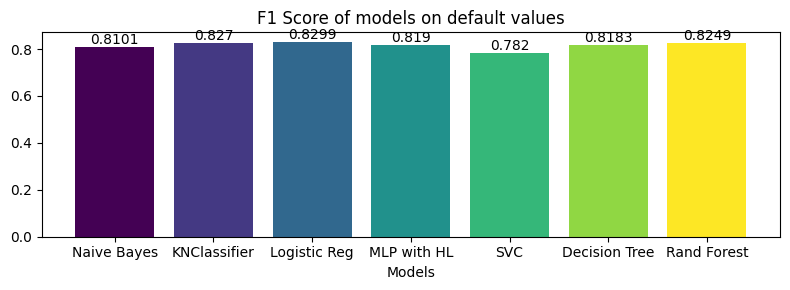

In [59]:
#ta parousiazw kai se ena graph:

models = ['Naive Bayes', 'KNClassifier', 'Logistic Reg', 'MLP with HL', 'SVC', 'Decision Tree', 'Rand Forest']
F1_Score_hyp = [f1_nbc_hyp, f1_knn_hyp, f1_lr_hyp, f1_mlp_hyp, f1_svc_hyp, f1_dt_hyp, f1_rf_hyp]

fig, ax = plt.subplots(figsize=(8, 3))

bars = ax.bar(models, F1_Score_hyp, color=plt.cm.viridis(np.linspace(0, 1, len(models))))

# Adding labels
ax.set_xlabel('Models')
ax.set_title('F1 Score of models on default values')

# Adding F1 Score values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

plt.tight_layout()
plt.show()


### 7. Προετοιμασία αρχείου για τη δεύτερη υποβολή στο kaggle

7.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις χρησιμοποιώντας το δοθέν σύνολο εκπαίδευσης (test set)

In [60]:
#X_submission
num = list(range(1, len(model_results_hyp[best_model_hyp])+1))
y_prediction_best_hyp = [int(x) for x in model_results_hyp[best_model_hyp]]

7.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 7α).

In [61]:
my_submission_hyp = pd.DataFrame({'id': num, 'RainTomorrow': y_prediction_best_hyp})
my_submission_hyp.to_csv('submission_best.csv', index=False)
my_submission_hyp

,id,RainTomorrow
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0
...,...,...
9694,9695,0
9695,9696,0
9696,9697,0
9697,9698,0


In [62]:
# kai pali axreiastos o pinakas, apla dixnei poses
# fores upologise oti tha vreksei tin epomeni 
model_results_hyp_without_svc = model_results_hyp
table_data = []
for model_name, predictions in model_results_hyp.items():
    ones_count = sum(predictions)  # Counting the number of ones in the list

    # Add color to the best model
    model_name_display = model_name if model_name != best_model_hyp else f"{Fore.GREEN}{model_name}{Style.RESET_ALL}"
    ones_count_display = ones_count if model_name != best_model_hyp else f"{Fore.GREEN}{ones_count}{Style.RESET_ALL}"

    table_data.append([model_name_display, ones_count_display])

# Display the table
headers = [f"{Fore.BLUE}Model{Style.RESET_ALL}", f"{Fore.BLUE}Number of Ones{Style.RESET_ALL}"]
table = tabulate(table_data, headers, tablefmt="grid")
print(table)

+-------------------------+------------------+
| Model                   |   Number of Ones |
+=========================+==================+
| Naive Bayes             |             2037 |
+-------------------------+------------------+
| KNeighborsClassifier    |             1620 |
+-------------------------+------------------+
| Logistic Regression     |             1514 |
+-------------------------+------------------+
| MLP with a hidden layer |             2597 |
+-------------------------+------------------+
| SVC                     |                0 |
+-------------------------+------------------+
| Decision Tree           |             1452 |
+-------------------------+------------------+
| Random Forest           |             1200 |
+-------------------------+------------------+
